<p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold"><br>
Projet 6 :<br><br>
Catégorisez automatiquement des questions<br><br>
</p><br>

* **Data Source / Data Source :** 
    - Data :
        - Outils d'extraction de data : https://data.stackexchange.com/stackoverflow
        - Script : https://github.com/EricJacquesPro/TextCategorization/blob/master/SQL/ExtractionDonnees.sql
    - Source Python : https://github.com/EricJacquesPro/TextCategorization
* **Description / Description : ** Projet 6 de la formation Data Scientist Proposée par OpenClassroom
    - Analyse LDA
    - Entrainement LDA
* **Auteur / Author : ** Eric JACQUES 
* **Date : ** 18/07/2020 

In [1]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.insert(0, './Python/')

In [2]:
'''
python class for the data engineering (reading, cleaning, training...)
localised in ./Python
'''
from tagText import TagText 

C:\Users\naru_\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
tagText = TagText()
print(tagText.urlDirectory)#folder for cvs file generated by SQL query (cf. I) 
print(tagText.fileName)#name of the cvs file generated by SQL query (cf. I)
data_question = tagText.read_source()
data_question.head()

tagText.nombre_post_entree = 30000#50#000
tagText.precision = 30000#50#000

Data/
QuestionVsTags.csv


In [4]:
data_preprocessed = data_question['body'].apply(tagText.preprocessing)
print(data_preprocessed[1:9])

1    accidentally committed wrong files git pushed ...
2    want delete branch locally remotely failed att...
3                       differences git pull git fetch
4    ive messing around json time pushing text hurt...
5    use yield keyword python do example im trying ...
6    mistakenly added files git using command git a...
7    reading hidden features dark corners cstl comp...
8    want rename remote branch described rename mas...
Name: body, dtype: object


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
III.2 - Train/Test</p>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Sampling dataset
vectorizer_X = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                   strip_accents = None, encoding = 'utf-8', 
                                   preprocessor=None, 
                                   token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                   max_features=1000)

# 80/20 split
X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(
    data_preprocessed, data_question['SelectedTags'], test_size=0.2,train_size=0.8, random_state=0)

# TF-IDF matrices
X_tfidf_train = vectorizer_X.fit_transform(X_lda_train)
X_tfidf_test = vectorizer_X.transform(X_lda_test)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
IV.2-a - Data - Tag generator - Unsupervised - LDA</p>

In [6]:
perfsTrain, perplexityTrain, perfsValidation, perplexityValidation = tagText.lda_find_topic_number(
                    X_lda_train, 
                    X_lda_test,
                    5,
                    10,#61,
                    2
                )


C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


{'verbose': 0, 'n_topics': 5, 'mean_change_tol': 0.001, 'max_doc_update_iter': 100, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'evaluate_every': -1, 'learning_decay': 0.7, 'topic_word_prior': None, 'learning_offset': 10.0, 'doc_topic_prior': None, 'total_samples': 1000000.0, 'n_components': 10, 'learning_method': 'online', 'max_iter': 10, 'batch_size': 128}


C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


{'verbose': 0, 'n_topics': 7, 'mean_change_tol': 0.001, 'max_doc_update_iter': 100, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'evaluate_every': -1, 'learning_decay': 0.7, 'topic_word_prior': None, 'learning_offset': 10.0, 'doc_topic_prior': None, 'total_samples': 1000000.0, 'n_components': 10, 'learning_method': 'online', 'max_iter': 10, 'batch_size': 128}


C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


{'verbose': 0, 'n_topics': 9, 'mean_change_tol': 0.001, 'max_doc_update_iter': 100, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'evaluate_every': -1, 'learning_decay': 0.7, 'topic_word_prior': None, 'learning_offset': 10.0, 'doc_topic_prior': None, 'total_samples': 1000000.0, 'n_components': 10, 'learning_method': 'online', 'max_iter': 10, 'batch_size': 128}


In [7]:
print(len(perfsTrain))
print(len(perfsValidation))


3
3


In [8]:
print(max(perfsTrain))
print(max(perfsValidation))

-13408115.921467036
-13408115.921467036


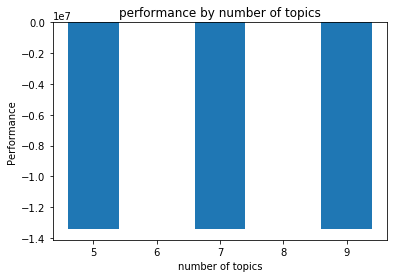

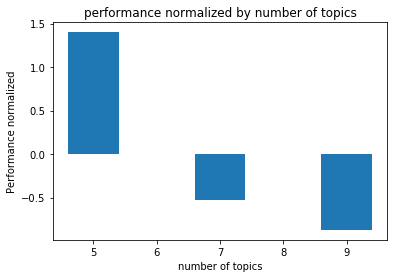

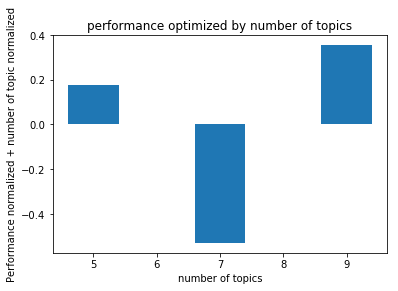

In [9]:
import matplotlib.pyplot as plt
import numpy as np
mini=min(perfsTrain)
x = range(5,10,2)#,61,2)

from sklearn.preprocessing import scale
perfs_normalized = scale( perfsTrain, axis=0, with_mean=True, with_std=True, copy=True )
x_normalized = scale( x, axis=0, with_mean=True, with_std=True, copy=True )

plt.bar(x, perfsTrain)
plt.ylabel("Performance")
plt.xlabel("number of topics")
plt.title("performance by number of topics")
plt.show()

plt.bar(x, perfs_normalized)
plt.ylabel("Performance normalized")
plt.xlabel("number of topics")
plt.title("performance normalized by number of topics")
plt.show()

perfs_topic_optimized = np.add(x_normalized, perfs_normalized)
plt.bar(x, perfs_topic_optimized)
plt.ylabel("Performance normalized + number of topic normalized")
plt.xlabel("number of topics")
plt.title("performance optimized by number of topics")
plt.show()

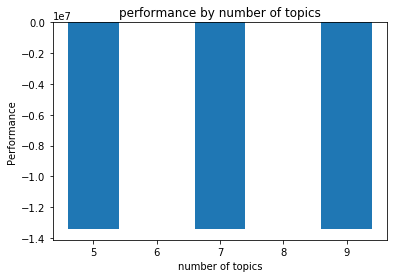

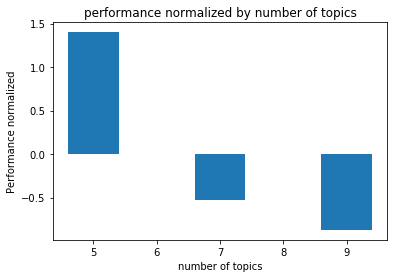

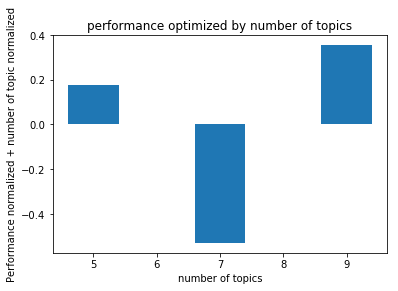

In [10]:
import matplotlib.pyplot as plt
import numpy as np
mini=min(perfsValidation)
x = range(5,10,2)#61,2)

from sklearn.preprocessing import scale
perfs_normalized = scale( perfsValidation, axis=0, with_mean=True, with_std=True, copy=True )
x_normalized = scale( x, axis=0, with_mean=True, with_std=True, copy=True )

plt.bar(x, perfsValidation)
plt.ylabel("Performance")
plt.xlabel("number of topics")
plt.title("performance by number of topics")
plt.show()

plt.bar(x, perfs_normalized)
plt.ylabel("Performance normalized")
plt.xlabel("number of topics")
plt.title("performance normalized by number of topics")
plt.show()

perfs_topic_optimized = np.add(x_normalized, perfs_normalized)
plt.bar(x, perfs_topic_optimized)
plt.ylabel("Performance normalized + number of topic normalized")
plt.xlabel("number of topics")
plt.title("performance optimized by number of topics")
plt.show()

In [11]:
    def lda_predict(
        model,
        text,
        lda,
        lda_df_topic_keywords,
        lda_tf_vectorizer,
        no_top_words
    ):
        '''
        predict tag form text in function of lda, topic ad tf vectorizer
        '''
        text = tagText.preprocessing(text)
        text = [text]
        mytext = lda_tf_vectorizer.transform(text)
        lda_topic_probability_scores = lda.transform(mytext)
        lda_topic = lda_df_topic_keywords.iloc[
            tagText.np.argmax(lda_topic_probability_scores),
            :
        ].values.tolist()
        topic_array = model.np.array(lda_topic)
        lda_feature_names = lda_tf_vectorizer.get_feature_names()
        return (
            " ".join(
                        [
                            lda_feature_names[i]
                            for i in topic_array.argsort()
                            [
                                :-no_top_words - 1:-1
                            ]
                        ]
                )
        )

In [30]:
    def lda_predictV3(
        model,
        text,
        lda,
        lda_df_topic_keywords,
        lda_tf_vectorizer,
        no_top_words
    ):
        '''
        predict tag form text in function of lda, topic ad tf vectorizer
        '''
        threshold = 0.010
        list_scores = []
        list_words = []
        used = set()

        text = model.preprocessing(text)
        text = [text]
        mytext = lda_tf_vectorizer.transform(text)
        text_projection = lda.transform(mytext)
        lda_feature_names = lda_tf_vectorizer.get_feature_names()
        lda_components = lda.components_ / lda.components_.sum(axis=1)[:, model.np.newaxis] # normalization

        for topic in range(model.n_topic):
            topic_score = text_projection[0][topic]

            for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
                score = topic_score*word_score

                if score >= threshold:
                    list_scores.append(score)
                    list_words.append(lda_feature_names[word_idx])
                    used.add(lda_feature_names[word_idx])

        results = [tag for (y,tag) in sorted(zip(list_scores,list_words), key=lambda pair: pair[0], reverse=True)]
        unique_results = [x for x in results if x not in used] # get only unique tags
        tags = " ".join(results[:5])

        return tags
        '''
        lda_topic_probability_scores = lda.transform(mytext)
        lda_topic = lda_df_topic_keywords.iloc[
            self.np.argmax(lda_topic_probability_scores),
            :
        ].values.tolist()
        topic_array = self.np.array(lda_topic)
        lda_feature_names = lda_tf_vectorizer.get_feature_names()
        return (
            " ".join(
                        [
                            lda_feature_names[i]
                            for i in topic_array.argsort()
                            [
                                :-no_top_words - 1:-1
                            ]
                        ]
                )
        )
        '''


In [32]:
lda_tagText, df_topic_keywords, tf_vectorizer = tagText.lda_prepare_tag(data_preprocessed, 32)

print(lda_predictV3(tagText, 'I cannot intall a git repository. I try github and gitlab', lda_tagText, df_topic_keywords, tf_vectorizer, 5))
print(lda_predict(tagText, 'I cannot intall a git repository. I try github and gitlab', lda_tagText, df_topic_keywords, tf_vectorizer, 5))
print(tagText.lda_predict( 'I cannot intall a git repository. I try github and gitlab', lda_tagText, df_topic_keywords, tf_vectorizer, 5))
print(lda_predictV3(tagText, "How to cast number as integer in java", lda_tagText, df_topic_keywords, tf_vectorizer, 5))
print(lda_predict( "How to cast number as integer in java", lda_tagText, df_topic_keywords, tf_vectorizer, 5))
print(tagText.lda_predict( "How to cast number as integer in java", lda_tagText, df_topic_keywords, tf_vectorizer, 5))

C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


{'verbose': 0, 'n_topics': 32, 'mean_change_tol': 0.001, 'max_doc_update_iter': 100, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'evaluate_every': -1, 'learning_decay': 0.7, 'topic_word_prior': None, 'learning_offset': 10.0, 'doc_topic_prior': None, 'total_samples': 1000000.0, 'n_components': 10, 'learning_method': 'online', 'max_iter': 10, 'batch_size': 128}
Log Likelihood:  -10057976.954678098
Perplexity:  4529.366588026681
{'verbose': 0, 'n_topics': 32, 'mean_change_tol': 0.001, 'max_doc_update_iter': 100, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'evaluate_every': -1, 'learning_decay': 0.7, 'topic_word_prior': None, 'learning_offset': 10.0, 'doc_topic_prior': None, 'total_samples': 1000000.0, 'n_components': 10, 'learning_method': 'online', 'max_iter': 10, 'batch_size': 128}
git branch commit changes
git branch commit changes repository
git branch commit changes
int


TypeError: lda_predict() missing 1 required positional argument: 'no_top_words'

In [ ]:
tagText.nombre_post_entree

In [14]:

print(lda_predict(tagText, 'How to cast number as integer in java', lda_tagText, df_topic_keywords, tf_vectorizer, 5))

int code new test print


In [15]:

print(tagText.lda_predict( "How to cast number as integer in java", lda_tagText, df_topic_keywords, tf_vectorizer, 5))

int


In [16]:

print(tagText.lda_predict( "How to cast number as integer in java", lda_tagText, df_topic_keywords, tf_vectorizer, 10))

int


In [17]:
from joblib import dump, load
dump(lda_tagText, 'lda.joblib',0)
dump(df_topic_keywords, 'df_lda_topic_keywords.joblib',0)
dump(tf_vectorizer, 'tf_lda_vectorizer.joblib',0)

['tf_lda_vectorizer.joblib']

In [18]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic :", topic_idx, ":" )
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
print('Topics : ')
display_topics(lda_tagText, tf_vectorizer.get_feature_names(), no_top_words)



Topics : 
Topic : 0 :
table select database data query
Topic : 1 :
use difference used understand question
Topic : 2 :
determine certificate days ago firstname
Topic : 3 :
exception android open info warning
Topic : 4 :
git branch commit changes repository
Topic : 5 :
button input form click user
Topic : 6 :
using stuff ways developer easily
Topic : 7 :
version install build npm package
Topic : 8 :
file command run windows running
Topic : 9 :
object property objects properties copy
Topic : 10 :
like im way want using
Topic : 11 :
var let dev differences heard
Topic : 12 :
null number thanks style tag
Topic : 13 :
int code new test print
Topic : 14 :
ex practices cleaner non defines
Topic : 15 :
im new file code using
Topic : 16 :
androidlayoutheightwrapcontent linearlayout androidlayoutwidthwrapcontent androidlayoutwidthfillparent icon
Topic : 17 :
function string return url foo
Topic : 18 :
line file module attribute python
Topic : 19 :
component template angular bind increase
Topic :

In [19]:

print('Topics From working class : ')
tagText.display_topics(lda_tagText, tf_vectorizer.get_feature_names(), no_top_words)

Topics From working class : 
Topic : 0 :
table select database data query
Topic : 1 :
use difference used understand question
Topic : 2 :
determine certificate days ago firstname
Topic : 3 :
exception android open info warning
Topic : 4 :
git branch commit changes repository
Topic : 5 :
button input form click user
Topic : 6 :
using stuff ways developer easily
Topic : 7 :
version install build npm package
Topic : 8 :
file command run windows running
Topic : 9 :
object property objects properties copy
Topic : 10 :
like im way want using
Topic : 11 :
var let dev differences heard
Topic : 12 :
null number thanks style tag
Topic : 13 :
int code new test print
Topic : 14 :
ex practices cleaner non defines
Topic : 15 :
im new file code using
Topic : 16 :
androidlayoutheightwrapcontent linearlayout androidlayoutwidthwrapcontent androidlayoutwidthfillparent icon
Topic : 17 :
function string return url foo
Topic : 18 :
line file module attribute python
Topic : 19 :
component template angular bi

In [28]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_preprocessed)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [29]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_tagText, data_preprocessed, tf_vectorizer.get_feature_names())
LDAvis_prepared

ValueError: not enough values to unpack (expected 2, got 1)

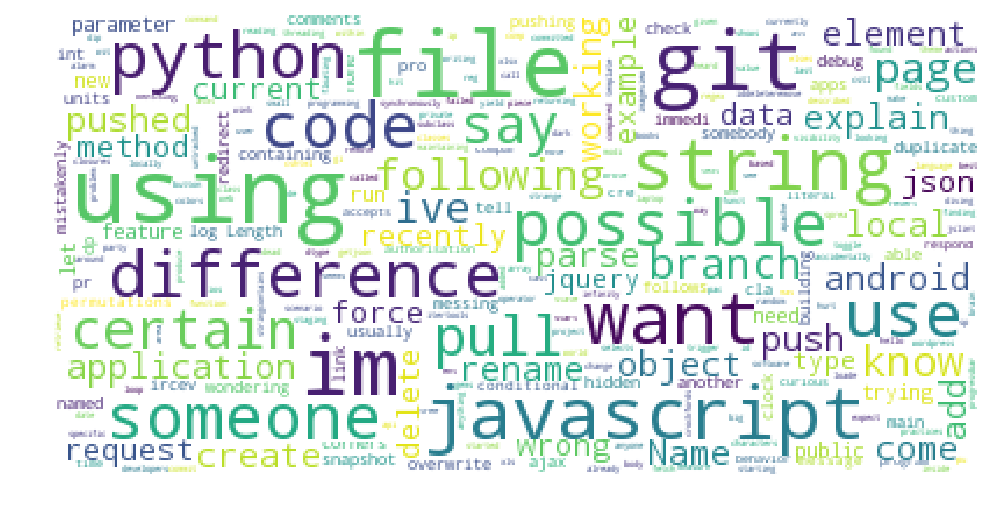

In [26]:

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data_preprocessed))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from plotly.offline import plot
import plotly.graph_objects as go

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data_preprocessed, 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from plotly.offline import plot
import plotly.graph_objects as go

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data_preprocessed, 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the question text after removing stop words and lemmatization"))
fig.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from plotly.offline import plot
import plotly.graph_objects as go

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(data_preprocessed, 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the question text"))
fig.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000,          
                            )

data_vectorized = vectorizer.fit_transform(data_preprocessed)

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

In [35]:
import pyLDAvis.gensim
import gensim

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

AttributeError: module 'pyLDAvis' has no attribute 'sklearn'

In [ ]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Sampling dataset
vectorizer_X = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                   strip_accents = None, encoding = 'utf-8', 
                                   preprocessor=None, 
                                   token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                   max_features=1000)

# 80/20 split
X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(
    data_preprocessed, data_question['SelectedTags'], test_size=0.2,train_size=0.8, random_state=0)

# TF-IDF matrices
X_tfidf_train = vectorizer_X.fit_transform(X_lda_train)
X_tfidf_test = vectorizer_X.transform(X_lda_test)

In [ ]:

def lda(vectorizer, data_train, data_test):

    from sklearn.decomposition import LatentDirichletAllocation, NMF
    ''' Showing the perplexity score for several LDA models with different values
    for n_components parameter, and printing the top words for the best LDA model
    (the one with the lowest perplexity)
    Parameters:
    vectorizer: TF-IDF convertizer                                              
    data_train: data to fit the model with
    data_test: data to test
    '''

    best_perplexity = np.inf
    best_lda = 0
    perplexity_list = []
    n_topics_list = []
    print("Extracting term frequency features for LDA...")

    for n_topics in np.linspace(10, 50, 5, dtype='int'):
        lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(data_train)
        n_topics_list.append(n_topics)
        perplexity = lda_model.perplexity(data_test)
        perplexity_list.append(perplexity)

        # Perplexity is defined as exp(-1. * log-likelihood per word)
        # Perplexity: The smaller the better
        if perplexity <= best_perplexity:
            best_perplexity = perplexity
            best_lda = lda_model
                                
    plt.title("Evolution of perplexity score depending on number of topics")
    plt.xlabel("Number of topics")
    plt.ylabel("Perplexity")
    plt.plot(n_topics_list, perplexity_list)
    plt.show()

In [ ]:
lda(vectorizer_X, X_tfidf_train, X_tfidf_train)

In [ ]:
def Recommend_tags_lda(text, X_train):
    
    from sklearn.decomposition import LatentDirichletAllocation, NMF
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.
    Parameters:
    text: the stackoverflow post of user
    X_train: data to fit the model with
    '''

    '''
    text = clean_text(text)
    text = no_code(text)
    text = clean_punct(text)
    text = stopWordsRemove(text)
    text = lemmatization(text, ['NOUN', 'ADV'])
    '''
    text = tagText.preprocessing(text)
    n_topics = 10
    threshold = 0.010
    list_scores = []
    list_words = []
    used = set()

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    vectorizer_text.fit(X_train)
    text_tfidf = vectorizer_text.transform([text])

    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    text_projection = lda_model.transform(text_tfidf)
    feature_names = vectorizer_text.get_feature_names()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for topic in range(n_topics):
        topic_score = text_projection[0][topic]

        for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
            score = topic_score*word_score

            if score >= threshold:
                list_scores.append(score)
                list_words.append(feature_names[word_idx])
                used.add(feature_names[word_idx])

    results = [tag for (y,tag) in sorted(zip(list_scores,list_words), key=lambda pair: pair[0], reverse=True)]
    unique_results = [x for x in results if x not in used] # get only unique tags
    tags = " ".join(results[:5])

    return tags

In [ ]:
Recommend_tags_lda("git is good but how can I push my evolution in new branch", data_question['SelectedTags'])

In [27]:
def average_jaccard(y_true,y_pred):

    ''' It calculates Jaccard similarity coefficient score for each instance,and
    it finds their averange in percentage
    Parameters:
    y_true: truth labels
    y_pred: predicted labels
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100